<a href="https://colab.research.google.com/github/DAASHeo/Contents_Bigdata/blob/main/%EA%B2%BD%EB%82%A8%EC%BD%94%EB%A1%9C%EB%82%98%ED%98%84%ED%99%A9_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # 학과 : IT미디어공학전공

  # 학번 : 20200788

  # 이름 : 허은 

In [ ]:
!pip install pandas numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
import io
coro = pd.read_csv(io.BytesIO(uploaded['kyoungnam_corona.csv']),sep=",")

Saving kyoungnam_corona.csv to kyoungnam_corona.csv


## 기초 데이터 분석

In [ ]:
coro.head(10)  #괄호 안의 인자만큼 데이터를 가져와서 행과 열로 보여줌

,Date,Death,Infection
0,2020-01-01,0,0
1,2020-02-01,0,10
2,2020-03-01,0,9
3,2020-04-01,0,0
4,2020-05-01,0,0
5,2020-06-01,0,0
6,2020-07-01,0,0
7,2020-08-01,0,0
8,2020-09-01,0,0
9,2020-10-01,0,0


데이터 10개가 인덱스 순서대로 출력되었다

In [ ]:
print(coro.shape)# 데이터의 (행, 열) 크기를 확인
print(coro.info())#데이터프레임의 행과 열의 구성 정보를 확인
#coro를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력

(33, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       33 non-null     object
 1   Death      33 non-null     int64 
 2   Infection  33 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 920.0+ bytes
None


결과값 분석 -> 데이터는 총 33개의 행과 3개의 열을 가지고 있다. 또한, 열은 Date(날짜), Death(사망), Infection(확진)으로 구성되어있으며, 각각의 열에 대한 데이터타입은 object, 정수, 정수로 구성되어있다.

In [ ]:
print(coro.columns) #데이터 열의 정보 출력
print(coro.describe()) # 데이터의 수치형 피처들의 기초 통계량 확인

Index(['Date', 'Death', 'Infection'], dtype='object')
           Death     Infection
count  33.000000     33.000000
mean    1.818182    785.333333
std     6.120940   2068.822667
min     0.000000      0.000000
25%     0.000000      0.000000
50%     0.000000      9.000000
75%     1.000000    105.000000
max    33.000000  10155.000000


## 가설 1
코로나의 확산 속도가 빠르기 때문에 코로나가 시작된 2020년도보다 2022년도의 확진자가 더 많을 것이다.

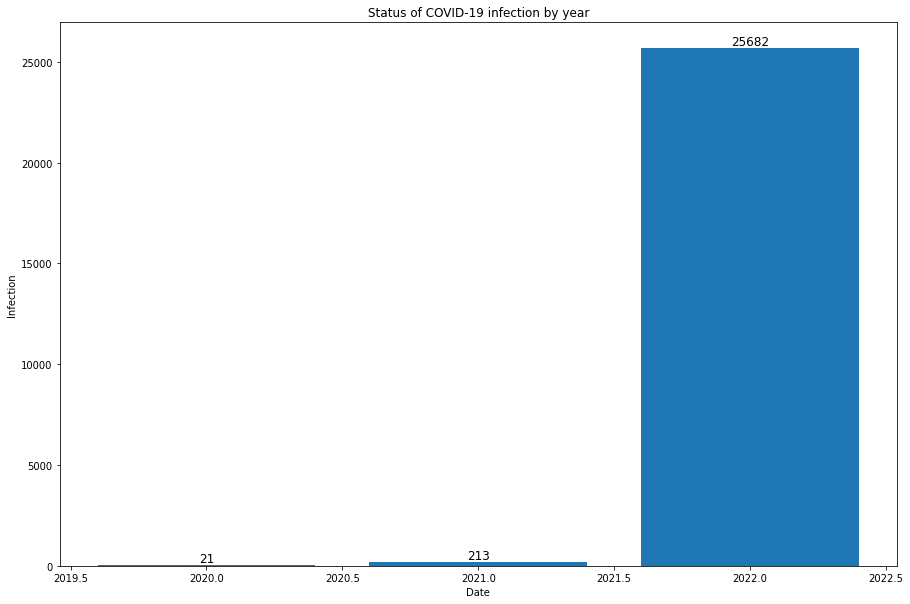

In [ ]:
plt.figure(figsize=(15, 10)) #차트의 기본 크기 설정
date = coro['Date'].apply(lambda x: x[:4]) # 우리가 필요한것은 년도이므로 lambda를 이용해 나머지 부분은 잘라준다.

#lambda를 이용해 추출한 년도를 기준으로 그룹화해준 후 그에 대한 확진자의 합을 리스트 형태로 반환
year_infection = (coro.groupby(date)['Infection'].sum()).values.tolist() 

x = [2020, 2021, 2022] #x에 대한 데이터값 -> 년도
y = [year_infection[0],year_infection[1],year_infection[2]] #y에 대한 데이터값 -> 년도별 확진자 수의 합
bar = plt.bar(x,y)

plt.xlabel('Date') #x라벨 설정 
plt.ylabel('Infection') #y라벨 설정
plt.title('Status of COVID-19 infection by year') #그래프에 대한 제목 설정-"연도별 경남 코로나 확진자 현황"

# 막대 그래프에 숫자 넣는 부분
# plt.bar 함수를 객체로 선언하고, 이 객체를 for 문으로 순회하면서 그래프의 값에 해당하는 height를 .get_height() 함수로 받아오고
# plt.text 함수에서 숫자가 새겨지기를 원하는 높이, 소수점 포맷팅, 숫자의 위치, 글자 크기 등을 지정
for rect in bar:
    height = rect.get_height() #그래프의 값에 해당하는 height를 .get_height() 함수로 받아옴
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%0.f' % height, ha='center', va='bottom', size = 12) #숫자가 새겨지기를 원하는 높이, 소수점 포맷팅, 숫자의 위치, 글자 크기 지정
plt.show() #그래프 출력

### 분석
2020년도의 경남 확진자는 21명, 2021년도는 213명, 2022년도에는 25682명으로 2020년도에 비해 2022년도의 확진자 수가 많을 것이라는 가설이 옳았음을 확인할 수 있다.

## 가설2
확진자 수가 가장 많은 날 사망자 수 또한 가장 많을 것이다.

### 검증
막대 그래프와 히트맵을 통한 확진자 수와 사망자 수의 연관성 확인

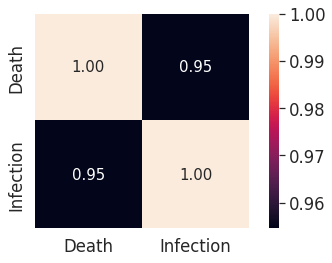

In [ ]:
#히트맵 그리기 -> 색이 밝을수록 연관도가 높다
cols = ['Death', 'Infection'] # 그래프 출력을 위한 cols 이름을 축약합니다.
corr = coro[cols].corr(method = 'pearson') #Death와 Infection 피처간의 상관관계를 분석해 corr변수에 저장
cols_view = ['Death', 'Infection'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5) #폰트 사이즈 설정
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #그래프 우측에 그려진 값에 따른 색상 변화를 표시 여부
            annot=True, #데이터 셀 안에 값을 출력여부
            square=True, #데이터 셀 정사각형 여부
            fmt='.2f', #소수점 자릿수 소수점 아래 둘째자리까지 
            annot_kws={'size': 15}, #데이터 셀 안에 표시된 폰트 크기 설정
            yticklabels=cols_view, #데이터 y레이블 표시
            xticklabels=cols_view) #데이터 x레이블 표시

plt.tight_layout() #서브 플롯간에 올바른 간격
plt.show() #히트맵 출력

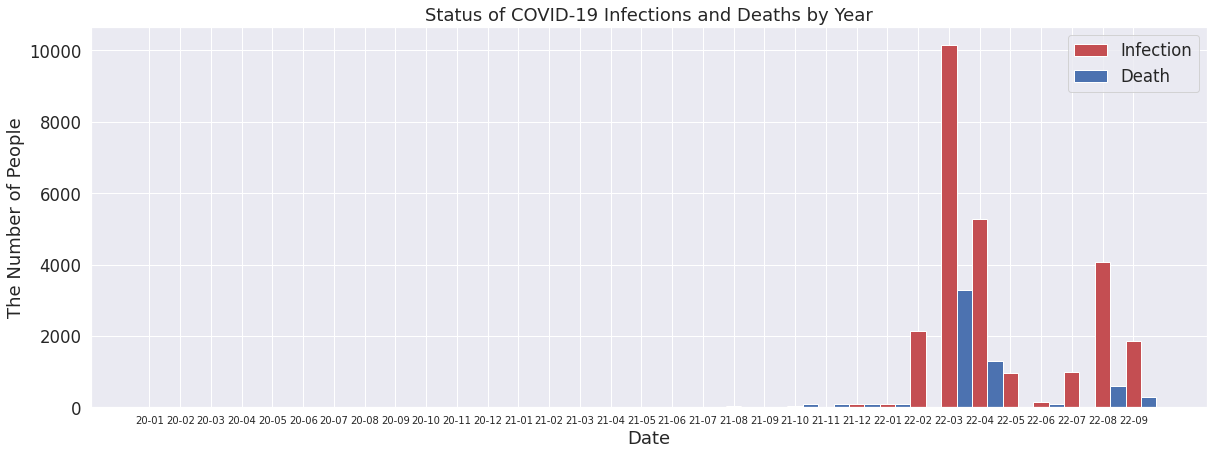

In [ ]:
date = coro['Date'].apply(lambda x: x[2:7]) # 우리가 필요한것은 년도-월이므로 lambda를 이용해 나머지 부분은 잘라준다.
bar_width = 0.5 #바 굵기

# 날짜의 데이터값의 갯수를 구하기 위해 리스트로 변환 후 길이 구해서 위치의 기준으로 잡음
index = np.arange(len(date.tolist()))

plt.figure(figsize=(20, 7)) #차트의 기본 크기 설정

b1 = plt.bar(index,coro['Infection'],bar_width, color='r', label='Infection') #확진자 수에 대한 막대 그래프 생성
b2 = plt.bar(index + bar_width,coro['Death']*100,bar_width, color='b', label='Death') #사망자 수에 대한 막대 그래프 생성
# 확진자에 비해 사망자의 수가 현저히 적어서 한 그래프에 나타나지 않아서 사망자 수에 100배를 해주어 사망자 수와 확진자 수의 관계만을 확인

plt.xticks(index, date.tolist())  #x축의 눈금 표시
plt.tick_params(axis='x', direction='inout', length=10, labelsize=10, width=1, color = 'black') #눈금 스타일 설정

plt.ylabel('The Number of People') #y라벨 설정 - 인원수
plt.xlabel('Date') #x라벨 설정
plt.title('Status of COVID-19 Infections and Deaths by Year') #막대그래프 제목 설정-경남 코로나 확진자 및 사망자 현황
plt.legend() #범례 표시
plt.show() #그래프 출력

### 분석
히트맵을 처음 볼때는 Death와 Infection의 연관도에 대한 색상이 짙고 어두워 연관도가 낮다고 생각했으나 수치가 0.95로 높은 연관도를 의미하고 있다.

정확한 분석을 위해 추가적으로 막대그래프를 생성하였고, 이를 통해 가설이 옳았음을 확인할 수 있다.

확진자 수가 가장 많은 날 사망자 수 또한 가장 많은 것을 확인할 수 있다.

확진자 수가 가장 높은 2022년 03월에 사망자 수 또한 가장 높다.

## 가설3
코로나 확진자 수는 겨울에 많을 것이다.

### 검증
봄(3·4·5월), 여름(6·7·8월), 가을(9·10·11월), 겨울(12·1·2월)로 나누어 확진자 수를 합친 후 파이 차트로 표시 후 분석

In [ ]:
coro['Date'] = coro['Date'].apply(lambda x: int(x[5:7])) # 우리가 필요한것은 년도-월이므로 lambda를 이용해 나머지 부분은 잘라준다.
# print(coro['Date'])
monthly_infection = coro.groupby('Date')['Infection'].sum() #월별에 따른 확진자 수 합산
# monthly_infection.sort_values(ascending=False)[:10]

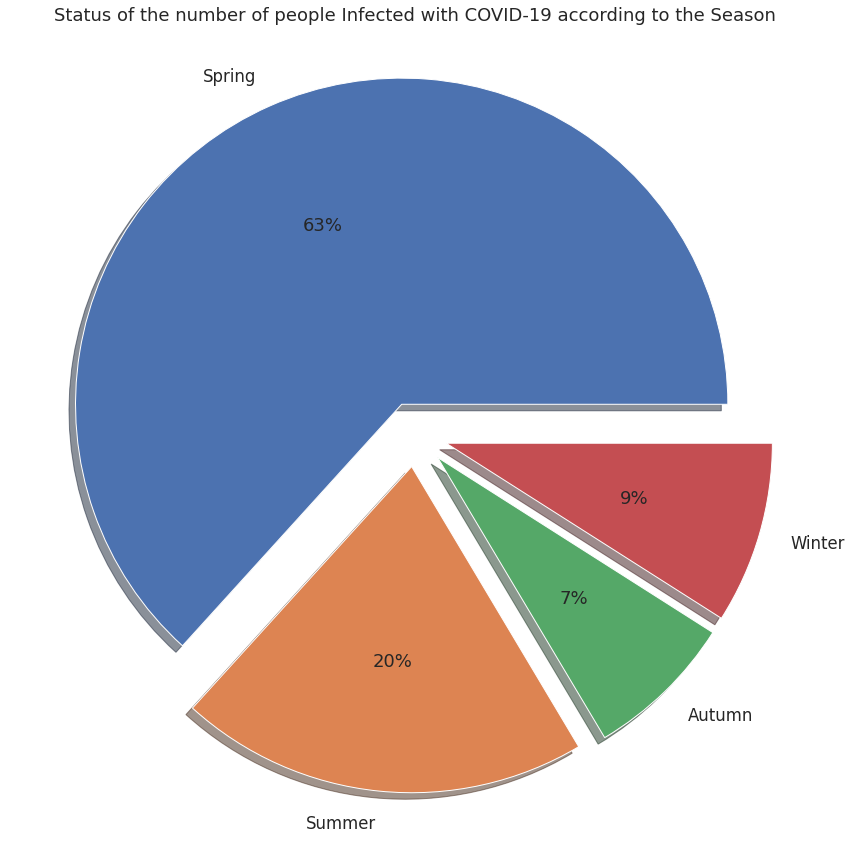

In [ ]:
plt.figure(figsize=(15, 15)) #차트의 기본 크기 설정

fracs = monthly_infection.values.tolist() #월별 확진자 수의 값들을 리스트 형태로 반환

# 봄(3·4·5월), 여름(6·7·8월), 가을(9·10·11월), 겨울(12·1·2월)로 나누어 확진자 수를 합친 후 파이 차트로 표시
labels = ['Spring','Summer','Autumn','Winter'] #라벨 이름에 대한 리스트 생성
season = [(fracs[2]+fracs[3]+fracs[4]),(fracs[5]+fracs[6]+fracs[7]),(fracs[8]+fracs[9]+fracs[10]),(fracs[0]+fracs[1]+fracs[11])]
# 봄, 여름, 가을, 겨울에 해당하는 달의 확진자 수를 합쳐서 새로운 리스트 생성

explode = [0.1, 0.1, 0.1, 0.1] #중심으로 벗어나는 정도 설정 -> 반지름의 10% 만큼 벗어나도록 설정

#파이차트 생성 -> data는 season 리스트의 값, 라벨 및 벗어남의 정도 설정, 부채꼴 안에 표시될 숫자의 형식은 소수점 아래 표시 안함,그림자 효과 
plt.pie(season, explode = explode, labels=labels, autopct="%0.f%%", shadow=True) 
plt.title('Status of the number of people Infected with COVID-19 according to the Season') #차트에 대한 타이틀-"계절에 따른 코로나 확진자 수 현황"
plt.show() #그래프 출력

### 분석
봄의 확진자 수가 전체의 63%, 여름의 확진자 수가 전체의 20%, 가을의 확진자 수가 전체의 7%, 겨울의 확진자 수가 전체의 9%로 겨울에 확진자 수가 가장 많을 것으로 예상한 가설이 틀렸다는 것이 검증되었다.  